## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [94]:
X = np.linspace(0, 20)
y = (-1 * X) + 2

In [95]:
print(X.shape)
print(y.shape)

(50,)
(50,)


#### Plot your data points. 

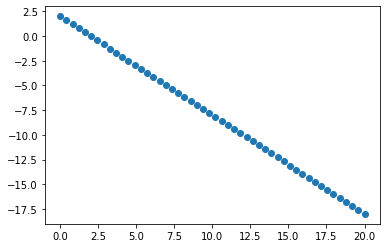

In [96]:
plt.scatter(X, y);

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [97]:
def gd_single(X, y, alpha, iterations):
    m = len(y)
    J = []
    theta_0 = 0
    theta_1 = 0
    theta1 = []
    theta0 = []
    old_cost = 0
    counter = 0
    hyp_list = []
    for _ in range(iterations):
        hyp = theta_0 + (theta_1 * X)
        hyp_list.append(hyp)
        error = hyp - y
        new_cost = sum((error**2)) / (2 * m)
        J.append(new_cost)
        gradient0 = (1/m) * np.sum(error)
        gradient1 = (1/m) * np.sum(error * X)
        theta_0 = theta_0 - (alpha * gradient0)
        theta_1 = theta_1 - (alpha * gradient1)
        theta0.append(theta_0)
        theta1.append(theta_1)
        if abs(old_cost - new_cost ) < 1e-3:
            break
        old_cost = new_cost
        counter += 1
    return J, theta0, theta1, theta_0, theta_1, counter, hyp_list

In [98]:
J, theta0_list, theta1_list, theta_0, theta_1, counter, hyp_list = gd_single(X, y, 0.01, 1000)
counter

203

In [99]:
r2_score(y, hyp_list[-1])

0.9888470328949429

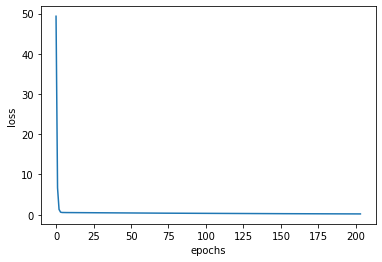

In [100]:
plt.plot(J)
plt.xlabel("epochs")
plt.ylabel("loss");

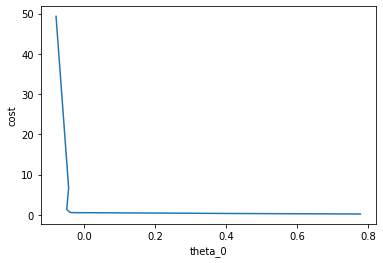

In [101]:
plt.plot(theta0_list, J)
plt.xlabel("theta_0")
plt.ylabel("cost");

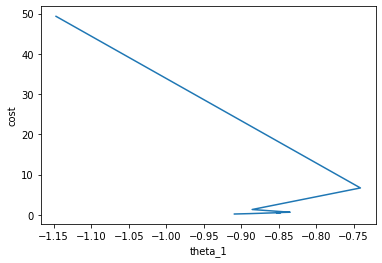

In [102]:
plt.plot(theta1_list, J)
plt.xlabel("theta_1")
plt.ylabel("cost");

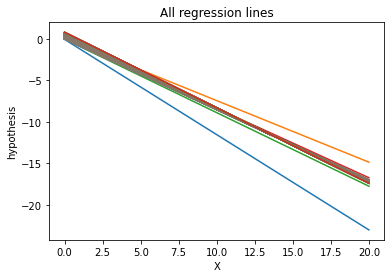

In [103]:
for i in range(0, len(theta0_list)):
    hyp = theta0_list[i] + (theta1_list[i] * X)
    plt.plot(X, hyp)
plt.title("All regression lines")
plt.xlabel("X")
plt.ylabel("hypothesis")
plt.show()

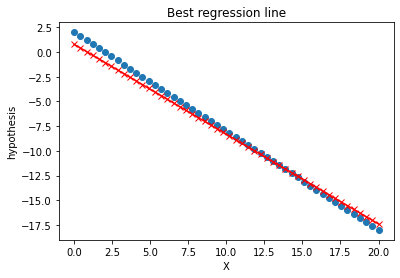

In [104]:
plt.scatter(X, y)
hyp = theta0_list[-1] + (theta1_list[-1] * X)
plt.plot(X, hyp, c='r', marker='x')
plt.title("Best regression line")
plt.xlabel("X")
plt.ylabel("hypothesis");

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

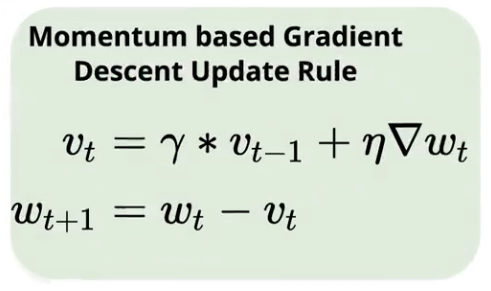

#### γ takes values between 0 and 1.
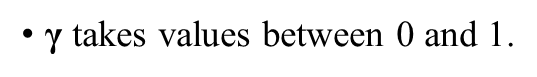

In [105]:
def gd_momentum(X, y, alpha, gamma, iterations):
    m = len(y)
    J = []
    theta_0 = 0
    theta_1 = 0
    theta1 = []
    theta0 = []
    old_cost = 0
    counter = 0
    hyp_list = []
    v0 = 0
    v1 = 0
    for _ in range(iterations):
        hyp = theta_0 + (theta_1 * X)
        hyp_list.append(hyp)

        error = hyp - y
        new_cost = sum((error**2)) / (2 * m)
        J.append(new_cost)

        gradient0 = (1/m) * np.sum(error)
        gradient1 = (1/m) * np.sum(error * X)

        theta_0 = theta_0 - (alpha * gradient0)
        theta_1 = theta_1 - (alpha * gradient1)

        v0 = (gamma * v0) + (alpha * gradient0)
        v1 = (gamma * v1) + (alpha * gradient1)

        theta_0 = theta_0 - v0
        theta_1 = theta_1 - v1
        
        theta0.append(theta_0)
        theta1.append(theta_1)
        if abs(old_cost - new_cost ) < 1e-3:
            break
        old_cost = new_cost
        counter += 1
    
    return J, theta0, theta1, theta_0, theta_1, counter, hyp_list

In [106]:
J, theta0_list, theta1_list, theta_0, theta_1, counter, hyp_list = gd_momentum(X, y, 0.001, 1, 1000)

In [107]:
r2_score(y, hyp_list[-1])

0.9999638278973368

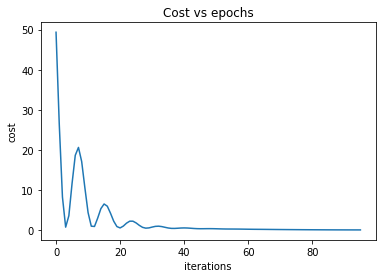

In [108]:
plt.plot(J)
plt.title("Cost vs epochs")
plt.ylabel("cost")
plt.xlabel("iterations");

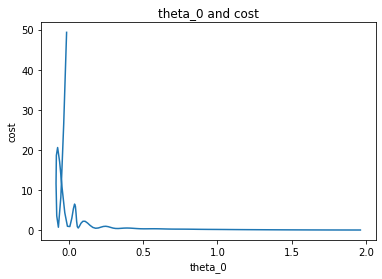

In [109]:
plt.plot(theta0_list, J)
plt.title("theta_0 and cost")
plt.xlabel("theta_0")
plt.ylabel("cost");

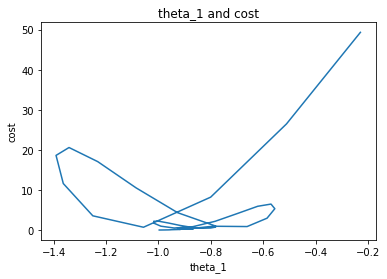

In [110]:
plt.plot(theta1_list, J)
plt.title("theta_1 and cost")
plt.xlabel("theta_1")
plt.ylabel("cost");

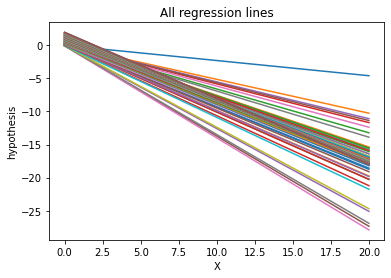

In [111]:
for i in range(0, len(theta0_list)):
    hyp = theta0_list[i] + (theta1_list[i] * X)
    plt.plot(X, hyp)
plt.title("All regression lines")
plt.xlabel("X")
plt.ylabel("hypothesis");

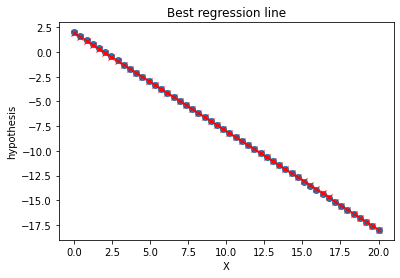

In [112]:
plt.scatter(X, y)
hyp = theta0_list[-1] + (theta1_list[-1] * X)
plt.plot(X, hyp, c='r', marker='x')
plt.title("Best regression line")
plt.xlabel("X")
plt.ylabel("hypothesis");

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [128]:
J, theta0_list, theta1_list, theta_0, theta_1, counter, hyp_list = gd_momentum(X, y, 0.001, 1, 1000)
counter

95

In [129]:
r2_score(y, hyp_list[-1])

0.9999638278973368

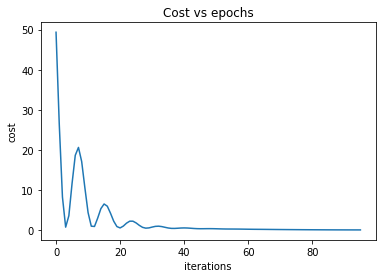

In [130]:
plt.plot(J)
plt.title("Cost vs epochs")
plt.ylabel("cost")
plt.xlabel("iterations");

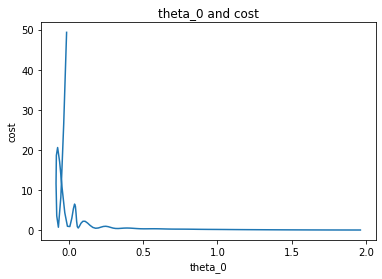

In [131]:
plt.plot(theta0_list, J)
plt.title("theta_0 and cost")
plt.xlabel("theta_0")
plt.ylabel("cost");

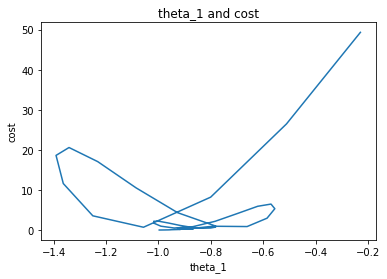

In [132]:
plt.plot(theta1_list, J)
plt.title("theta_1 and cost")
plt.xlabel("theta_1")
plt.ylabel("cost");

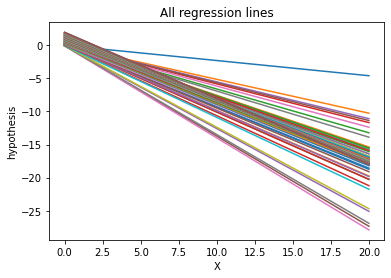

In [133]:
for i in range(0, len(theta0_list)):
    hyp = theta0_list[i] + (theta1_list[i] * X)
    plt.plot(X, hyp)
plt.title("All regression lines")
plt.xlabel("X")
plt.ylabel("hypothesis");

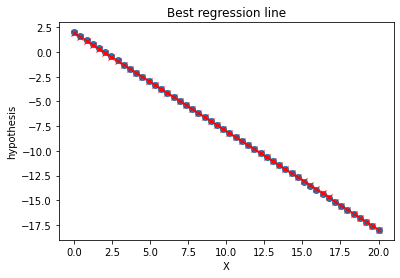

In [134]:
plt.scatter(X, y)
hyp = theta0_list[-1] + (theta1_list[-1] * X)
plt.plot(X, hyp, c='r', marker='x')
plt.title("Best regression line")
plt.xlabel("X")
plt.ylabel("hypothesis");

### Update your Batch GD for one variable  implementation to be NAG and check your results

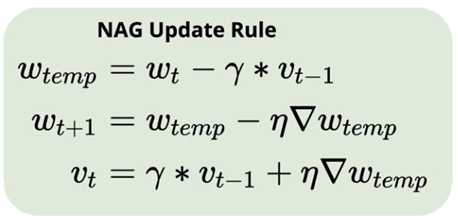

In [162]:
def gd_NAG(X, y, alpha, gamma, iterations):
    m = len(y)
    J = []
    theta_0 = 0
    theta_1 = 0
    theta1_list = []
    theta0_list = []
    hyp_list = []
    v0 = 0
    v1 = 0
    gradient0_temp = 0
    gradient1_temp = 0
    theta_0_temp = 0
    theta_1_temp = 0
    old_cost = 0
    counter = 0
    for _ in range(iterations):
        theta_0_temp = theta_0_temp - (gamma * v0)
        theta_1_temp = theta_1_temp - (gamma * v1)
        
        hyp = theta_0_temp + (theta_1_temp * X)
        hyp_list.append(hyp)

        error = hyp - y
        new_cost = sum((error**2)) / (2 * m)
        J.append(new_cost)

        gradient0_temp = (1/m) * np.sum(error)
        gradient1_temp = (1/m) * np.sum(error * X)

        v0 = (gamma * v0) + (alpha * gradient0_temp)
        v1 = (gamma * v1) + (alpha * gradient1_temp)

        theta_0 = theta_0_temp - (alpha * gradient0_temp)
        theta_1 = theta_1_temp - (alpha * gradient1_temp)
        theta0_list.append(theta_0)
        theta1_list.append(theta_1)
        if abs(old_cost - new_cost) < 1e-3:
            break
        old_cost = new_cost
        counter += 1

    return J, theta0_list, theta1_list, theta_0, theta_1, hyp_list, counter

In [163]:
J, theta0_list, theta1_list, theta_0, theta_1, hyp_list, counter = gd_NAG(X, y, 0.01, 0.9, 1000)
counter

64

In [164]:
r2_score(y, hyp_list[-1])

0.9970888765979415

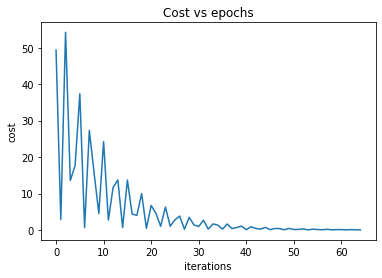

In [165]:
plt.plot(J)
plt.title("Cost vs epochs")
plt.ylabel("cost")
plt.xlabel("iterations");

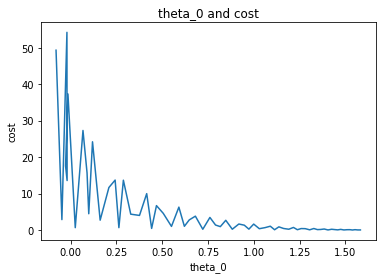

In [166]:
plt.plot(theta0_list, J)
plt.title("theta_0 and cost")
plt.xlabel("theta_0")
plt.ylabel("cost");

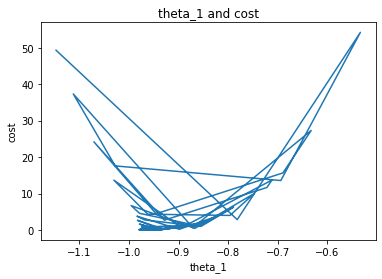

In [167]:
plt.plot(theta1_list, J)
plt.title("theta_1 and cost")
plt.xlabel("theta_1")
plt.ylabel("cost");

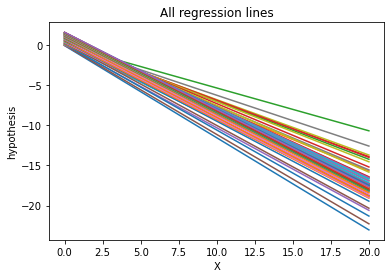

In [168]:
for i in range(0, len(theta0_list)):
    hyp = theta0_list[i] + (theta1_list[i] * X)
    plt.plot(X, hyp)
plt.title("All regression lines")
plt.xlabel("X")
plt.ylabel("hypothesis");

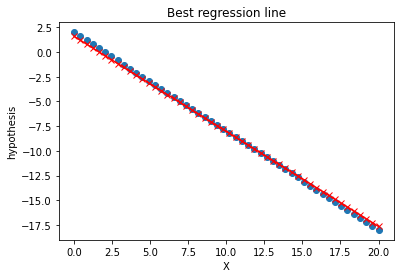

In [169]:
plt.scatter(X, y)
hyp = theta0_list[-1] + (theta1_list[-1] * X)
plt.plot(X, hyp, c='r', marker='x')
plt.title("Best regression line")
plt.xlabel("X")
plt.ylabel("hypothesis");

## Congratulations 
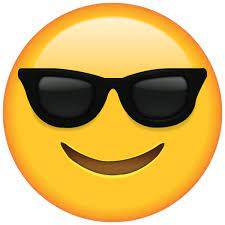

In [170]:
print("Thanks")

Thanks
